In [23]:
import cv2
import numpy as np
import matplotlib as mpl
mpl.use("TkAgg")
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

/Users/lxt/xiaoteng/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  after removing the cwd from sys.path.


In [24]:
r_cam = 1
r_hum = 5
omg_cam = 3 * np.pi
omg_hum = 10 * np.pi 

In [25]:
def update(data):
    global line1, line2
    line1.set_data([data[0], data[1]])
    line1.set_3d_properties(data[2])
    line2.set_data([data[3], data[4]])
    line2.set_3d_properties(data[5])
    return line1, line2

def init():
    global line1, line2
    ti = 0
    t = t_drange[np.mod(ti, t_dlen)]

    x1_cam_ini = x_cam + r_cam * np.cos(omg_cam * t + np.pi)
    y1_cam_ini = y_cam 
    z1_cam_ini = z_cam + r_cam * np.sin(omg_cam * t + np.pi)
    x1_hum_ini = x_hum + r_hum *np.sin(omg_hum * t)
    y1_hum_ini = y_hum + r_hum * np.cos(omg_hum * t)
    z1_hum_ini = z_hum

    line1, = ax.plot([x1_cam_ini], [y1_cam_ini], [z1_cam_ini], marker='o', 
                     color='green', markersize=8)
    line2, = ax.plot([x1_hum_ini], [x1_hum_ini], [z1_hum_ini], marker='o', 
                     color='yellow', markersize=8)
    return line1, line2

def data_gene():
    global x_cam,y_cam,z_cam,t_dlen,x_hum,y_hum,z_hum
    
    data = []
    for ti in range(1, t_dlen):
        t = t_drange[ti]
        x1_cam_data = x_cam + r_cam * np.cos(omg_cam * t + np.pi)
        y1_cam_data = y_cam 
        z1_cam_data = z_cam + r_cam * np.sin(omg_cam * t + np.pi)
        x1_hum_data = x_hum + r_hum *np.sin(omg_hum * t)
        y1_hum_data = y_hum + r_hum * np.cos(omg_hum * t)
        z1_hum_data = z_hum
        data.append([x1_cam_data, y1_cam_data, z1_cam_data, 
                     x1_hum_data, y1_hum_data, z1_hum_data])
    return data

In [26]:
#time range
t_range = np.arange(0, 1 + 0.005, 0.005)
t_len = len(t_range)
t_drange = np.arange(0, 1, 0.005)
t_dlen = len(t_drange)
#camera coordinate
x_cam, y_cam, z_cam = 3, 4, 5
#human coordinate
x_hum = y_hum = z_hum = 10
#camera trajectory
x1_cam = x_cam + r_cam * np.cos(omg_cam * t_range + np.pi)
y1_cam = y_cam + np.zeros(t_len)
z1_cam = z_cam + r_cam * np.sin(omg_cam * t_range + np.pi)
#human trajectory
x1_hum = x_hum + r_hum *np.sin(omg_hum * t_range)
y1_hum = y_hum + r_hum * np.cos(omg_hum * t_range)
z1_hum = z_hum + np.zeros(t_len)

Text(0.5, 0.92, 'Camera-Human Simulation')

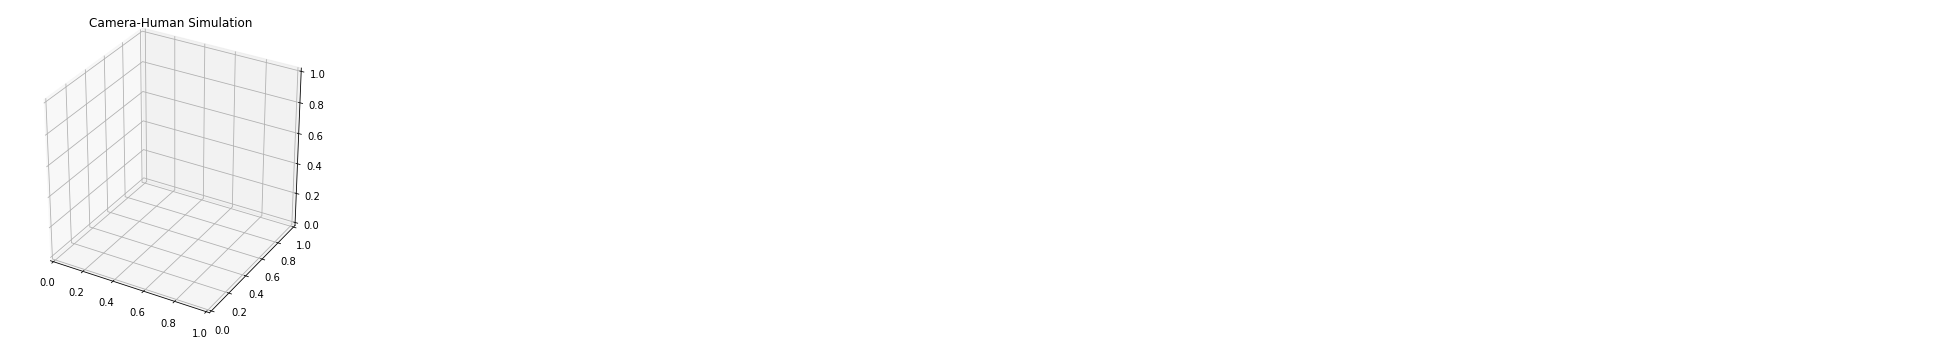

In [27]:
fig = plt.figure(figsize=(6,6))
axis  = fig.add_subplot(111,projection='3d')
axis.set_aspect('equal')
axis.set_title("Camera-Human Simulation")

In [28]:
#plot the figure
axis.plot([0], [0], [0], marker='o', color= 'black', markersize=16)
axis.plot(x1_cam, y1_cam, z1_cam, 'r')
axis.plot(x1_hum, y1_hum, z1_hum, 'b')
axis.set_xlim([0, 30])
axis.set_ylim([0, 30])
axis.set_zlim([0, 20])
# line1 update camera trajectory dynamically
# line2 update human trajectory dynamically
line1, = axis.plot([], [], [], marker='o', color='green', markersize=8, animated = True)
line2, = axis.plot([], [], [], marker='o', color='yellow', markersize=8, animated = True)
#animation representation
ani = animation.FuncAnimation(fig, update, frames = data_gene(), 
                               init_func = init,interval = 10)
plt.show()